# Introduction to spatial data analysis with geopandas

In this chapter, we will first learn how geometric objects are represented in Python using a library called [shapely](https://shapely.readthedocs.io/en/stable/manual.html) [^shapely]. After this, we will use [geopandas](https://geopandas.org/) [^geopandas] as our main tool for spatial data analysis. In the first part of this book, we covered the basics of data analysis using the pandas library. Geopandas extends the capacities of pandas with geospatial operations. The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. This means that we can use many familiar methods from pandas also when working with geopandas and spatial features. A `GeoDataFrame` is basically a `pandas.DataFrame` that contains one column for geometries. The geometry column is a `GeoSeries` which contains the geometries  as `shapely` objects (points, lines, polygons, multipolygons etc.). 

## Representing vector geometries with `shapely` 

`Shapely` is a fundamental Python package for representing vector data geometries on a computer. Basic knowledge of shapely is important for using higher-level tools that depend on it, such as `geopandas`.  


 Under the hood `shapely` actually uses a C++ library called [GEOS](https://trac.osgeo.org/geos) [^GEOS] to construct the geometries, which is one of the standard libraries behind various Geographic Information Systems (GIS) software, such as [PostGIS](https://postgis.net/) [^PostGIS] or [QGIS](http://www.qgis.org/en/site/) [^QGIS]. Objects and methods available in shapely adhere mainly to [the Open Geospatial Consortium’s Simple Features Access Specification](https://www.ogc.org/standards/sfa) [^OGC_sfa] making them compatible with various GIS tools.

In this section, we give a quick overview of creating geometries using `shapely`. For a full list of `shapely` objects and methods, see [the shapely user manual online](https://shapely.readthedocs.io/en/stable/manual.html) [^shapely].

### Creating point geometries

When creating geometries with `shapely`, we first need to import the geometric object class (such as `Point`) that we want to create from `shapely.geometry` which contains all possible geometry types. After importing the `Point` class, creating a point is easy: we just pass `x` and `y` coordinates into the `Point()` -class (with a possible `z` -coordinate) which will create the point for us:

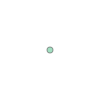

In [1]:
from shapely.geometry import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)

point

Jupyter Notebook is automatically able to visualize the point shape on the screen. We can use the print statement to get the text representation of the point geometry as [Well Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) [^WKT]. The letter Z indicates 3D coordinates. 

In [2]:
print(point)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


There are different approaches for extracting the coordinates of a `Point` as numerical values. The property the `coords` gives us to access the coordinates of the point geometry as a `CoordinateSequence` which data structure for storing a list of coordinates. For our purposes, we can convert the `coords` into a list to access its contents. 

In [3]:
list(point.coords)

[(2.2, 4.2)]

We can also access the coordinates directly using the `x` and `y` properties of the `Point` object.

In [4]:
print(point.x)
print(point.y)

2.2
4.2


Points and other shapely objects have many useful built-in attributes and methods. See [shapely documentation ](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods) [^shapely] for a full list. For example, it is possible to calculate the Euclidian distance between points, or to create a buffer polygon for the point object. However, all of these functionalities are integrated into `geopandas` and we will go through them later in the book. 


### Creating LineString geometries


Creating `LineString` -objects is fairly similar to creating `Point`-objects. We need at least two points for creating a line. We can construct the line using either a list of `Point`-objects or pass the point coordiantes as coordinate-tuples to the `LineString` constructor.

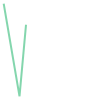

In [5]:
from shapely.geometry import Point, LineString

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([point1, point2, point3])
line_from_tuples = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line

In [6]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


As we can see from above, the WKT representation of the `line` -variable constitutes of multiple coordinate-pairs. `LineString` -objects have many useful built-in attributes and methods similarly as `Point` -objects. It is for instance possible to extract the coordinates, calculate the length of the `LineString`, find out the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point, or simplify the geometry. A full list of functionalities can be read from `shapely` documentation [^shapely]. Most of these functionalities are directly implemented in `geopandas` (see next chapter), hence you very seldom need to parse these information directly from the `shapely` geometries yourself. However, here we go through a few of them for reference. We can extract the coordinates of a LineString similarly as with `Point`:

In [7]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

As a result, we have a list of coordinate tuples (x,y) inside a list. If you need to access all `x` -coordinates or all `y` -coordinates of the line, you can do it directly using the `xy` attribute: 

In [8]:
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as `length` of the line and center of the line (`centroid`) straight from the `LineString` object itself:

In [9]:
length = line.length
centroid = line.centroid
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 52.46 units
Centroid: POINT (6.229961354035622 -11.892411157572392)


As you can see, the centroid of the line is again a Shapely Point object. In practice, you would rarely access these attributes directly from individual `shapely` geometries, but we can do the same things for a set of geometries at once using `geopandas`. 

### Creating Polygon geometries

Creating a `Polygon` -object continues the same logic of creating `Point` and `LineString` objects. A `Polygon` can be created by passing a list of `Point` objects or a list of coordinate-tuples as input for the `Polygon` class. Polygon needs at least three coordinate-tuples to form a surface. In the following, we use the same points from the earlier `LineString` example to create a `Polygon`.

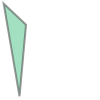

In [10]:
from shapely.geometry import Polygon

poly = Polygon([point1, point2, point3])
poly

In [11]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Notice that the `Polygon` WKT representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. A `Polygon` is constructed from *exterior* ring and and optiona *interior* ring, that can be used to represent a hole in the polygon. You can get more information about the `Polygon` object by running `help(poly)` of from the [shapely online documentation](https://shapely.readthedocs.io/en/stable/manual.html?highlight=Polygon#Polygon) [^polygon]. Here is a simplified extract from the output of `help(Polygon)`:

```
class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |     A sequence of (x, y [,z]) numeric coordinate pairs or triples.
 |     Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
```

If we want to create a `Polygon` with a hole, we can do this by using parameters `shell` for the exterior and `holes` for the interiors. 

Let's see how we can create a `Polygon` with a hole in it. Notice, that because a `Polygon` can have multiple holes, the `hole_coords` variable below contains nested square brackets (`[[ ]]`), which is due to the possibility of having multiple holes in a single `Polygon`. First, let's define the coordinates for the exterior and interior rings.

In [12]:
# Define the exterior
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the hole
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

Create the polygon with and without the hole:

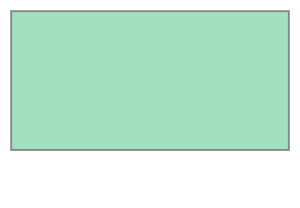

In [13]:
poly_without_hole = Polygon(shell=exterior)
poly_without_hole

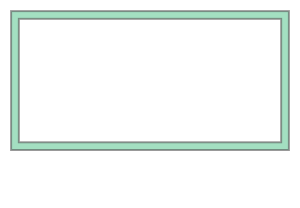

In [14]:
poly_with_hole = Polygon(shell=exterior, holes=hole)
poly_with_hole

Let's also check how the WKT representation of the polygon looks like.

In [15]:
print(poly_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the outer ring and the second one represents the inner ring, i.e. the hole.


There are many useful attributes and methods related to shapely `Polygon`, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. For a full list, the `shapely` documentation [^shapely]. Same attributes and methods are also available when working with polygon data in `geopandas`. Here are a couple of polygon attributes that are often useful when doing geographic data analysis.

In [16]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


Notice, that the `length` and `area` information are presented here in decimal degrees because our input coordinates were passed as longitudes and latitudes. We can get this information in more sensible format (in meters and m2) when we start working with data in a projected coordinate system later in the book. 

Box polygons that represent the minimum bounding box of given coordinates are useful in many applications. `shapely.box` can be used for creating rectangular box polygons based on on minimum and maximum `x` and `y` coordinates that represent the coordinate information of the bottom-left and top-right corners of the rectangle. Here we will use `shapely.box` to re-create the same polygon exterior.  

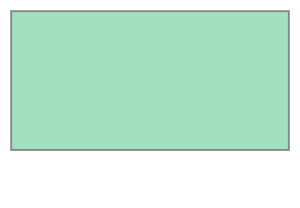

In [17]:
from shapely.geometry import box

min_x, min_y = -180, -90
max_x, max_y = 180, 90
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

In [18]:
print(box_poly)

POLYGON ((180 -90, 180 90, -180 90, -180 -90, 180 -90))


In practice, the `box` function is quite useful for example when you want to select geometries from a specific area of interest. In these cases, you only need to find out the coordinates of two points on the map to be able create the bounding box polygon.   

### Creating MultiPoint, MultiLineString and MultiPolygon geometries

Creating a collection of `Point`, `LineString` or `Polygon` objects is very straightforward now as you have seen how to create the basic geometric objects. In the `Multi` -versions of these geometries, you just pass a list of points, lines or polygons to the `MultiPoint`, `MultiLineString` or `MultiPolygon` constructors as shown below:

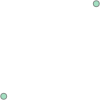

In [19]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

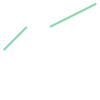

In [20]:
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

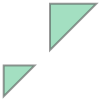

In [21]:
multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
multipoly

### Question 6.1

Create these shapes using Shapely!

- **Triangle**   
- **Square**    
- **Circle**

In [22]:
# Use this cell to enter your solution.

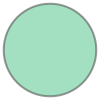

In [23]:
# Solution

# Triangle
Polygon([(0, 0), (2, 4), (4, 0)])

# Square
Polygon([(0, 0), (0, 4), (4, 4), (4, 0)])

# Circle (using a buffer around a point)
point = Point((0, 0))
point.buffer(1)

## Getting started with geopandas

![_**Figure 6.1**. Geometry column in a GeoDataFrame._](../img/geodataframe.png)

_**Figure 6.1**. Geometry column in a GeoDataFrame._

Similar to importing import pandas as `pd`, we will import geopandas as `gpd`:

In [24]:
import geopandas as gpd

C:\Users\vuokkhei\AppData\Local\Temp\ipykernel_13600\3841419929.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Reading a Shapefile

Esri Shapefile is the default file format when reading in data usign geopandas, so we only need to pass the file path in order to read in our data:

In [25]:
from pathlib import Path

input_folder = Path("../data/NLS")
fp = input_folder / "m_L4132R_p.shp"

In [26]:
# Read file using gpd.read_file()
data = gpd.read_file(fp)

Let's check the data type:

In [27]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame`. GeoDataFrame extends the functionalities of
`pandas.DataFrame` in a way that it is possible to handle spatial data using similar approaches and datastructures as in pandas (hence the name geopandas). 

Let's check the first rows of data: 

In [28]:
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,NaN,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,NaN,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,NaN,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,NaN,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,NaN,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


- Check all column names:

In [29]:
data.columns.values

array(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV',
       'KULKUTAPA', 'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI',
       'KARTOGLK', 'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX',
       'SIIRT_DY', 'KORKEUS', 'ATTR2', 'ATTR3', 'geometry'], dtype=object)

As you might guess, the column names are in Finnish.
Let's select only the useful columns and rename them into English:

In [30]:
data = data[["RYHMA", "LUOKKA", "geometry"]]

Define new column names in a dictionary:

In [31]:
colnames = {"RYHMA": "GROUP", "LUOKKA": "CLASS"}

Rename:

In [32]:
data.rename(columns=colnames, inplace=True)

Check the output:

In [33]:
data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


#### Question 6.2

Figure out the following information from our input data using your pandas skills:
    
- Number of rows?
- Number of classes?
- Number of groups?

In [34]:
# You can use this cell to enter your solution.

In [35]:
# Solution 

print("Number of rows", len(data["CLASS"]))
print("Number of classes", data["CLASS"].nunique())
print("Number of groups", data["GROUP"].nunique())

Number of rows 4311
Number of classes 20
Number of groups 1


It is always a good idea to explore your data also on a map. Creating a simple map from a `GeoDataFrame` is really easy. You can use ``.plot()`` -function from geopandas that **creates a map based on the geometries of the data**. Geopandas actually uses matplotlib for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data.

<AxesSubplot: >

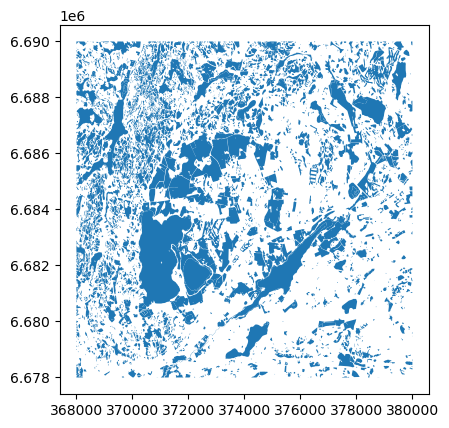

In [36]:
data.plot()

Voilá! As we can see, it is really easy to produce a map out of your geospatial data with `geopandas`. *If you are living in the Helsinki region in Finland, you might recognize the shapes plotted on the map!*

## Geometries in geopandas

Geopandas takes advantage of Shapely's geometric objects. Geometries are stored in a column called `geometry` that is a default column name for storing geometric information in geopandas.

Let's print the first 5 rows of the column 'geometry':

In [37]:
data["geometry"].head()

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry

As we can see the `geometry` column contains familiar looking values, namely shapely `Polygon` -objects. Since the spatial data is stored as shapely objects, it is possible to use shapely methods when dealing with geometries in geopandas. Also,  all `pandas` methods are directly available in `geopandas` without the need to import `pandas` separately. Let's have a closer look at the polygons and try to apply some of the methods we are already familiar with. Let's start by checking the area of the first polygon in the data.

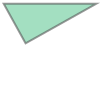

In [38]:
# Access the geometry on the first row of data
data.at[0, "geometry"]

In [39]:
# Print information about the area
print("Area:", round(data.at[0, "geometry"].area, 0), "square meters")

Area: 76.0 square meters


Geodataframes and geoseries have an attribute `area` which we can use for accessing the area for each feature at once.

In [40]:
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Length: 4311, dtype: float64

Let's next create a new column into our GeoDataFrame where we calculate and store the areas of individual polygons:

In [41]:
# Create a new column called 'area'
data["area"] = data.area

Check the output:

In [42]:
data["area"]

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Name: area, Length: 4311, dtype: float64

Let's check what is the `min`, `max` and `mean` of those areas using `pandas` functions introduced in Part 1.

In [43]:
# Maximum area
round(data["area"].max(), 2)

4084558.15

In [44]:
# Minimum area
round(data["area"].min(), 2)

0.67

In [45]:
# Average area
round(data["area"].mean(), 2)

11522.29

## Writing data into a file

It is possible to export GeoDataFrames into various data formats using the [to_file()](http://geopandas.org/io.html#writing-spatial-data) method. In our case, we want to export subsets of the data into Shapefiles (one file for each feature class).

Let's first select one class (class number `36200`, "Lake water") from the data as a new GeoDataFrame:


In [46]:
# Select a class
selection = data.loc[data["CLASS"] == 36200]

Check the selection:

<AxesSubplot: >

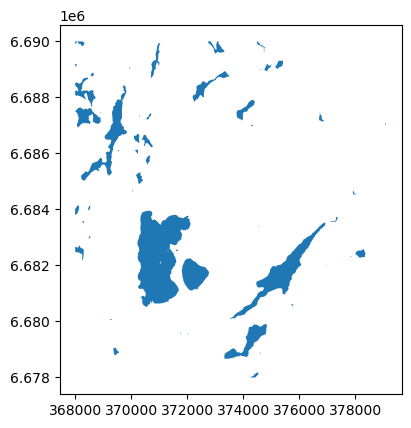

In [47]:
selection.plot()

Write this layer into a new Shapefile using the `gpd.to_file()` -function.

In [48]:
# Create a output path for the data
output_folder = Path("results")

if not output_folder.exists():
    output_folder.mkdir()

output_fp = output_folder / "Class_36200.shp"

In [49]:
# Write those rows into a new file (the default output file format is Shapefile)
selection.to_file(output_fp)

#### Question 6.3

Read the output Shapefile in a new geodataframe, and check that the data looks ok.

In [50]:
# Use this cell to enter your solution.

In [51]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

,GROUP,CLASS,area,geometry
0,64,36200,1318.878221,"POLYGON ((379089.473 6687069.722, 379093.838 6..."
1,64,36200,22918.867073,"POLYGON ((376732.156 6687178.141, 376731.301 6..."
2,64,36200,5759.318345,"POLYGON ((377939.741 6684539.678, 377929.192 6..."
3,64,36200,265899.648379,"POLYGON ((372948.857 6688594.047, 372935.951 6..."
4,64,36200,128221.314258,"POLYGON ((370900.963 6689201.649, 370890.077 6..."


<AxesSubplot: >

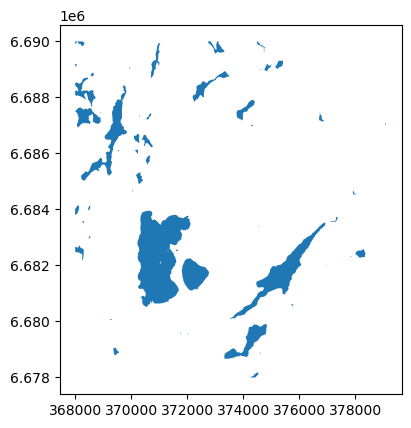

In [52]:
# Solution

# You can also plot the data for a visual check
temp.plot()

## Grouping the GeoDataFrame

Next we will automate the file export task. we will group the data based on column `CLASS` and export a shapefile for each class. Here we can use the `.groupby()` method from `pandas` and apply it on our `GeoDataFrame`. The function groups data based on values on selected column(s).  We will want to group the data by distinct classes. Before continuing, let's check the structure of our data from the first rows.

In [53]:
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


The `CLASS` column in the data contains information about different land use types represeted with class codes. We can also check all unique values in that column and the number of unique values.

In [54]:
# Print all unique values in the column
data["CLASS"].unique()

array([32421, 32200, 34300, 34100, 34700, 32500, 32112, 32111, 32611,
       32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000, 33100,
       36200, 36313], dtype=int64)

In [55]:
#Check the number of unique values
data["CLASS"].nunique()

20

Now we can group the data into 20 distinct groups based on the land use class code.

In [56]:
# Group the data by class
grouped = data.groupby("CLASS")

# Let's see what we have
len(grouped)

20

The grouped object is similar to a list of keys and values in a dictionary and we can access, for example, information about the group keys.

In [57]:
grouped.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

As it should be, the group keys are unique values from the column by which we grouped the dataframe. Let's also check how many rows of data belongs to each group.

In [58]:
# Iterate over the grouped object
for key, group in grouped:

    # Check how many rows each group has:
    print("Terrain class:", key)
    print("Number of rows:", len(group), "\n")

Terrain class: 32111
Number of rows: 1 

Terrain class: 32112
Number of rows: 1 

Terrain class: 32200
Number of rows: 2 

Terrain class: 32421
Number of rows: 110 

Terrain class: 32500
Number of rows: 2 

Terrain class: 32611
Number of rows: 257 

Terrain class: 32612
Number of rows: 11 

Terrain class: 32800
Number of rows: 80 

Terrain class: 32900
Number of rows: 28 

Terrain class: 33000
Number of rows: 5 

Terrain class: 33100
Number of rows: 118 

Terrain class: 34100
Number of rows: 3005 

Terrain class: 34300
Number of rows: 1 

Terrain class: 34700
Number of rows: 3 

Terrain class: 35300
Number of rows: 134 

Terrain class: 35411
Number of rows: 35 

Terrain class: 35412
Number of rows: 449 

Terrain class: 35421
Number of rows: 5 

Terrain class: 36200
Number of rows: 56 

Terrain class: 36313
Number of rows: 8 



There are, for example, 56 lake polygons (class number 36200) in the input data. To get a better sense of the data structure, we can also check how the _last_ group looks like (because at this point, we have the variables in memory from the last iteration of the for-loop).

In [59]:
group.head()

,GROUP,CLASS,geometry,area
4303,64,36313,"POLYGON ((377127.305 6688073.257, 377116.045 6...",9619.307973
4304,64,36313,"POLYGON ((371141.897 6677999.999, 371139.757 6...",25266.167705
4305,64,36313,"POLYGON ((371498.720 6680399.799, 371497.585 6...",364.087680
4306,64,36313,"POLYGON ((375668.607 6682942.062, 375671.489 6...",2651.800270
4307,64,36313,"POLYGON ((368411.063 6679328.990, 368411.424 6...",376.503380


Notice that the index numbers refer to the row numbers in the original data. Check also the data type of the group.

In [60]:
type(group)

geopandas.geodataframe.GeoDataFrame

At this point, the data are now grouped into separate GeoDataFrames by class. From here, we can save them into separate files.

### Saving multiple output files

Let's export each class into a separate Shapefile. While doing this, we also want to create unique filenames for each class.

When looping over the grouped object, information about the class is stored in the variable `key`, and we can use this information for creating new variable names inside the for-loop. For example, we want to name the shapefile containing lake polygons as "terrain_36200.shp".

In [61]:
# Determine output directory
output_folder = Path("../data")

# Create a new folder called 'Results'
result_folder = output_folder / "Results"

# Check if the folder exists already
if not result_folder.exists():

    print("Creating a folder for the results..")
    # If it does not exist, create one
    result_folder.mkdir()

At this point, you can go to the file browser and check that the new folder was created successfully. Finally, we will iterate over groups, create a file name, and save each group to a separate file.

In [62]:
# Iterate over the groups
for key, group in grouped:
    # Format the filename
    output_name = Path("terrain_{}.shp".format(key))

    # Print information about the process
    print("Saving file", output_name.name)

    # Create an output path
    outpath = result_folder / output_name

    # Export the data
    group.to_file(outpath)

Saving file terrain_32111.shp
Saving file terrain_32112.shp
Saving file terrain_32200.shp
Saving file terrain_32421.shp
Saving file terrain_32500.shp
Saving file terrain_32611.shp
Saving file terrain_32612.shp
Saving file terrain_32800.shp
Saving file terrain_32900.shp
Saving file terrain_33000.shp
Saving file terrain_33100.shp
Saving file terrain_34100.shp
Saving file terrain_34300.shp
Saving file terrain_34700.shp
Saving file terrain_35300.shp
Saving file terrain_35411.shp
Saving file terrain_35412.shp
Saving file terrain_35421.shp
Saving file terrain_36200.shp
Saving file terrain_36313.shp


Excellent! Now we have saved those individual classes into separate files and named the file according to the class name. Imagine how long time it would have taken to do the same thing manually.

### Save attributes to a text file

We can also extract basic statistics from our geodataframe, and save this information as a text file. Let's summarize the total area of each group.

In [63]:
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


In [64]:
area_info = grouped.area.sum().round()

In [65]:
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

Save area info to csv using pandas:

In [66]:
# Create an output path
area_info.to_csv(result_folder / "terrain_class_areas.csv", header=True)

## Footnotes

[^bounding_box]: <https://en.wikipedia.org/wiki/Minimum_bounding_box>
[^box]: <https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box>
[^geopandas]: <https://geopandas.org/>
[^GEOS]: <https://trac.osgeo.org/geos>
[^NLS_topodata]: <https://www.maanmittauslaitos.fi/en/maps-and-spatial-data/expert-users/product-descriptions/topographic-database>
[^NLS_lisence]: <https://www.maanmittauslaitos.fi/en/opendata-licence-cc40>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^paituli]: <https://avaa.tdata.fi/web/paituli/latauspalvelu>
[^polygon]: <https://shapely.readthedocs.io/en/stable/manual.html#polygons>
[^PostGIS]: <https://postgis.net/>
[^QGIS]: <http://www.qgis.org/en/site/>
[^shapely]: <https://shapely.readthedocs.io/en/stable/manual.html>
[^topodata_fair]: <https://etsin.fairdata.fi/dataset/5023ecc7-914a-4494-9e32-d0a39d3b56ae>
[^WKT]: <https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry>